### [시도별 평균 기온에 관한 분석 - Matplotlib]
- 데이터셋 : 2022 ~ 2024년까지 날짜별 지역별 폭염 데이터
- 컬럼 종류: 폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),  
  평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
- 연도별 지역에 따른 평균 온도에 차이가 있는지 비교
- 열대야에 따른 지역별 평균 기온 비교
- 습도와 체감 온도 간의 관계 분석
- 지역별 폭염영향예보(단계) 비율 비교
- 과정
    * 데이터파일 확인
        - 첫 번째 줄이 컬럼명 맞는지
        - 불필요한 컬럼이나 행이 있는지 확인
        - 결측치 정도 확인
    * 데이터 전처리 : 데이터 정리 및 손질
        - 파일 확인 후 체크한 사항 진행
        - 결측치 처리
        - 이상치 처리
        - 중복 데이터 처리
        - 형 변환 => 실제 데이터와 타입 일치
    * 데이터 가공 : 분석하고자 하는 데이터 형태
        - 행인덱스 처리 : 멀티인덱스/컬럼=>행인덱스/행인덱스 초기화
        - 필요한 컬럼 & 행 추출
        - 추가적인 결측치/이상치/중복데이터 처리
        - 형 변환 => 연속형 -> 범주형, 범주형 -> 연속형
    * 데이터 분석
        - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리

출처 : 기상청

대구는 대프리카라는 별명이 있듯이 대구는 전국에서 가장 더운 지역이라는 소문이 있다. 이번 분석을 통해 정말로 대구가 더운지, 덥다면 왜 더운지에 대해 확인하고 2024년 올해 더위를 어떻게 버틸 수 있을지 생각해보고자 한다.

In [1]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 데이터 준비
HW2206 = pd.read_csv('HW2206.csv')
HW2207 = pd.read_csv('HW2207.csv')
HW2208 = pd.read_csv('HW2208.csv')
HW2306 = pd.read_csv('HW2306.csv')
HW2307 = pd.read_csv('HW2307.csv')
HW2308 = pd.read_csv('HW2308.csv')
HW2406 = pd.read_csv('HW2406.csv')
HW2407 = pd.read_csv('HW2407.csv')

In [3]:
HW2206['자외선지수(단계)'].unique()

array(['높음', '매우높음', '보통', '낮음'], dtype=object)

## 1. 데이터파일 확인
- (1) 첫 번째 줄이 컬럼명 맞는지 확인

In [4]:
HW2206
# 첫 번째 줄이 컬럼명이 맞다.

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2022.6.1,북강릉(104),X,25.4,28.7,21.5,15.7,37.3,X,,X,높음
1,2022.6.1,동해(106),X,25.1,28.0,20.8,16.2,46.6,X,,X,높음
2,2022.6.1,서울(108),X,26.1,28.6,22.1,16.2,41.6,X,,X,매우높음
3,2022.6.1,인천(112),X,23.7,25.4,20.4,16.5,48.5,X,,X,매우높음
4,2022.6.1,원주(114),X,25.5,29.2,21.4,12.8,35.0,X,,X,매우높음
...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2022.6.30,북춘천(93),X,27.5,24.2,21.8,20.2,99.9,X,,X,보통
4856,2022.6.30,하동(932),X,32.4,31.2,26.9,24.0,85.0,X,관심,X,높음
4857,2022.6.30,철원(95),X,27.1,24.0,21.5,19.9,98.5,X,,X,보통
4858,2022.6.30,동두천(98),X,27.0,23.7,21.6,20.1,100.0,X,,X,보통


- (2) 불필요한 컬럼이나 행이 있는지 확인  

지역이 너무 세분화되어있어 특별시와 광역시만 추출

In [5]:
# 특정 지역의 데이터만 뽑아주는 함수
def make_city_df(df, city):
    # 지점 컬럼에서 지역명만 빼기
    list_data = []

    for i in df['지점']:
        list_data.append(i.split('(')[0])

    df['지점'] = list_data
    return df[df['지점'] == city]

def concat_data(city):
    data = pd.concat([make_city_df(HW2206, city), make_city_df(HW2207, city), make_city_df(HW2208, city), 
                      make_city_df(HW2306, city), make_city_df(HW2307, city), make_city_df(HW2308, city),
                      make_city_df(HW2406, city), make_city_df(HW2407, city)], ignore_index = True)
    return data

In [6]:
seoul = concat_data('서울')
daegu = concat_data('대구')
busan = concat_data('부산')
incheon = concat_data('인천')
daejeon = concat_data('대전')
gwangju = concat_data('광주')
ulsan = concat_data('울산')

In [7]:
seoul.info() # 237행 12열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          237 non-null    object 
 1   지점          237 non-null    object 
 2   폭염여부(O/X)   237 non-null    object 
 3   최고체감온도(°C)  237 non-null    float64
 4   최고기온(°C)    236 non-null    float64
 5   평균기온(°C)    236 non-null    float64
 6   최저기온(°C)    236 non-null    float64
 7   평균상대습도(%)   237 non-null    float64
 8   폭염특보(O/X)   237 non-null    object 
 9   폭염영향예보(단계)  237 non-null    object 
 10  열대야(O/X)    237 non-null    object 
 11  자외선지수(단계)   237 non-null    object 
dtypes: float64(5), object(7)
memory usage: 22.3+ KB


In [8]:
seoul.describe()

,최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%)
count,237.000000,236.000000,236.000000,236.000000,237.000000
mean,30.051477,29.436441,25.522458,22.271186,75.173418
std,2.777781,3.172399,2.675572,2.912368,11.573293
min,22.500000,20.100000,17.500000,14.900000,41.600000
25%,28.300000,27.100000,23.675000,20.375000,68.400000
50%,30.400000,29.750000,25.600000,22.650000,76.000000
75%,32.000000,31.925000,27.425000,24.500000,83.100000
max,35.700000,36.100000,30.900000,27.400000,99.300000


## 2. 데이터 전처리 : 데이터 정리 및 손질
- (1) 결측치 확인

In [9]:
# 결측치 확인하는 함수 생성
def city_na(city):
    return city.isna().sum()[city.isna().sum() >= 1]

city_list = [seoul, daegu, busan, incheon, daejeon, gwangju, ulsan]
city_name = ['서울', '대구', '부산', '인천', '대전', '광주', '울산']

for i in range(len(city_list)):
    print(f'[{city_name[i]} 결측치]\n{city_na(city_list[i])}\n')

[서울 결측치]
최고기온(°C)    1
평균기온(°C)    1
최저기온(°C)    1
dtype: int64

[대구 결측치]
최고기온(°C)    1
평균기온(°C)    1
dtype: int64

[부산 결측치]
최고기온(°C)    1
평균기온(°C)    1
dtype: int64

[인천 결측치]
최고기온(°C)    1
평균기온(°C)    1
dtype: int64

[대전 결측치]
평균기온(°C)    1
최저기온(°C)    1
dtype: int64

[광주 결측치]
최고체감온도(°C)    1
최고기온(°C)      1
평균기온(°C)      1
dtype: int64

[울산 결측치]
최고기온(°C)    1
평균기온(°C)    1
dtype: int64



In [10]:
# 결측치 평균으로 대체하는 함수 생성
def na_fill(city):
    city['최고체감온도(°C)'] = city['최고체감온도(°C)'].fillna(city['최고체감온도(°C)'].mean())
    city['최고기온(°C)'] = city['최고기온(°C)'].fillna(city['최고기온(°C)'].mean())
    city['평균기온(°C)'] = city['평균기온(°C)'].fillna(city['평균기온(°C)'].mean())
    city['최저기온(°C)'] = city['최저기온(°C)'].fillna(city['최저기온(°C)'].mean())

In [11]:
# 결측치 평균으로 대체
for i in city_list:
    na_fill(i)

for i in range(len(city_list)):
    print(f'[{city_name[i]} 결측치]\n{city_na(city_list[i])}\n')
# 결측치가 모두 처리되어 빈 시리즈 출력

[서울 결측치]
Series([], dtype: int64)

[대구 결측치]
Series([], dtype: int64)

[부산 결측치]
Series([], dtype: int64)

[인천 결측치]
Series([], dtype: int64)

[대전 결측치]
Series([], dtype: int64)

[광주 결측치]
Series([], dtype: int64)

[울산 결측치]
Series([], dtype: int64)



In [12]:
temp_name = ['최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)', '최저기온(°C)', '평균상대습도(%)']

In [13]:
city_name

['서울', '대구', '부산', '인천', '대전', '광주', '울산']

- (2) 이상치 처리

/var/folders/hf/j1jp3r4x3mgcms3hl1xy7krh0000gn/T/ipykernel_2825/1985524706.py:18: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/hf/j1jp3r4x3mgcms3hl1xy7krh0000gn/T/ipykernel_2825/1985524706.py:18: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/hf/j1jp3r4x3mgcms3hl1xy7krh0000gn/T/ipykernel_2825/1985524706.py:18: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/hf/j1jp3r4x3mgcms3hl1xy7krh0000gn/T/ipykernel_2825/1985524706.py:18: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/hf/j1jp3r4x3mgcms3hl1xy7krh0000gn/T/ipykernel_2825/1985524706.py:18: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/hf/j1jp3r4x3mgcms3hl1xy7krh0000gn/T/ipykernel_2825

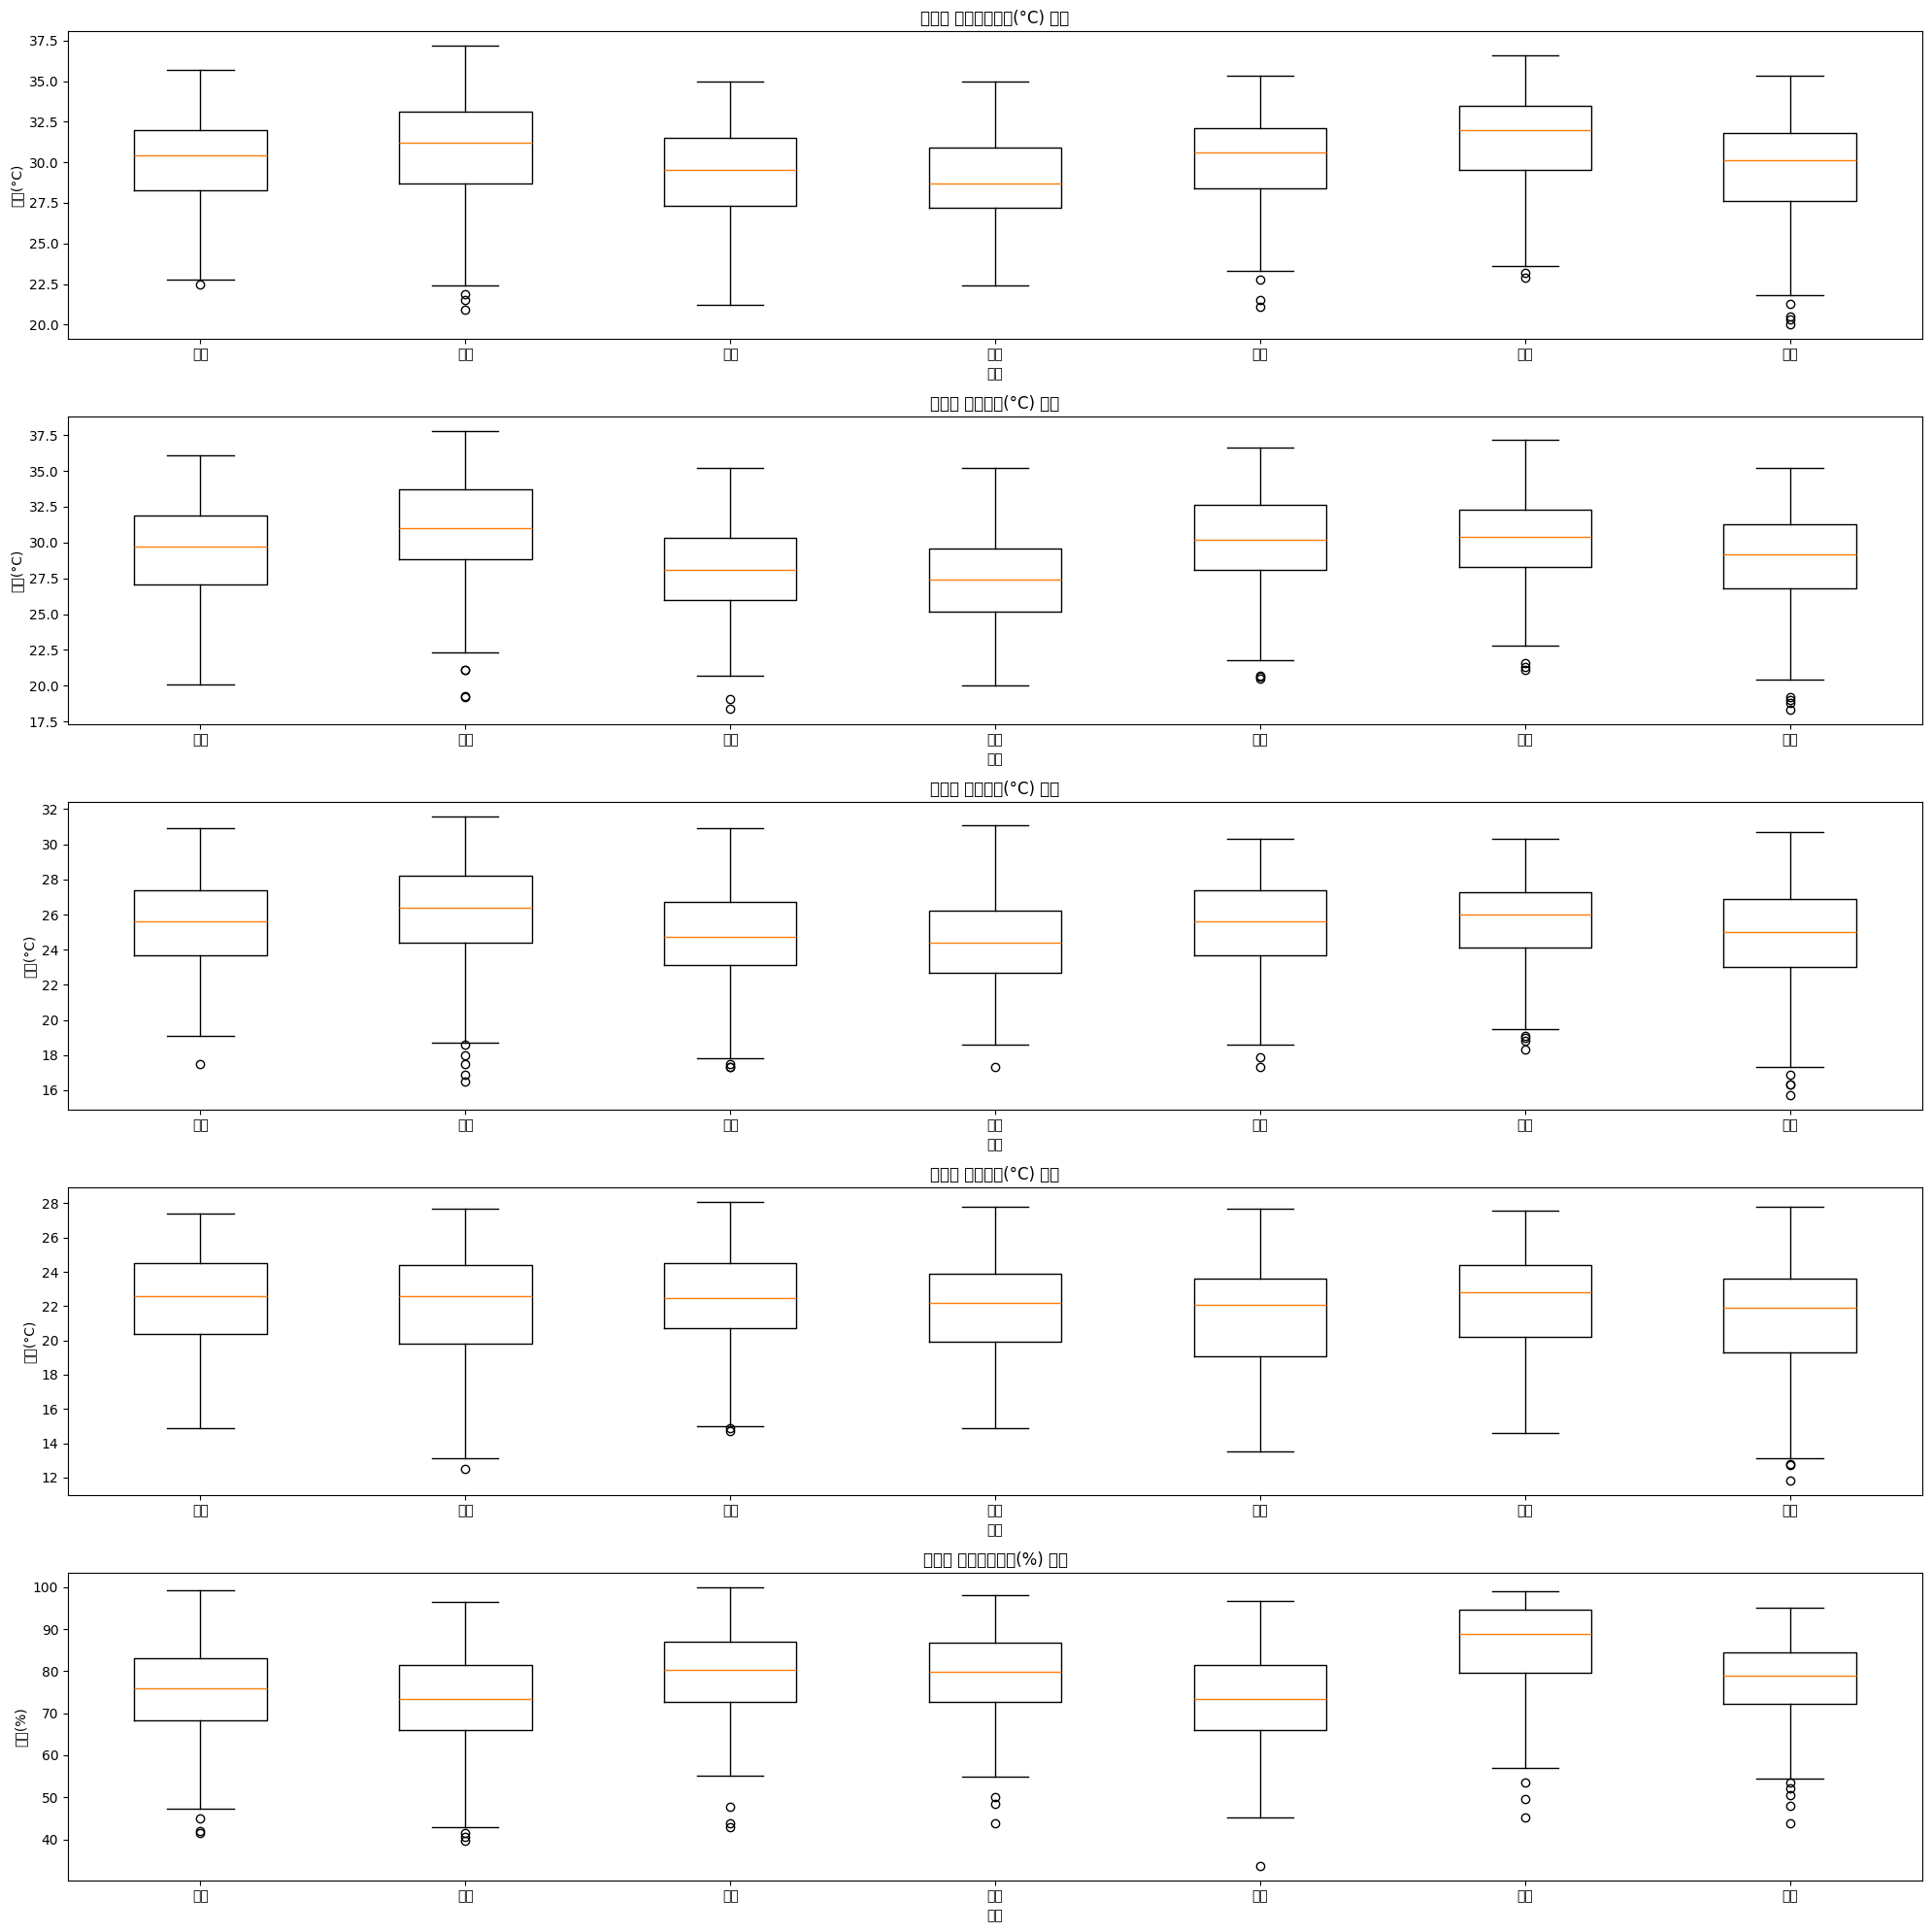

In [14]:
fig, axes = plt.subplots(5, 1, figsize = (20, 20))

for j in range(len(temp_name)):
    best_temp_list = []

    for i in city_list:
        best_temp_list.append(i[temp_name[j]])

    axes[j].boxplot(best_temp_list, tick_labels = city_name)
    axes[j].set_title(f'지역별 {temp_name[j]} 분포')
    axes[j].set_xlabel('지역')
    if j == 4:
        axes[j].set_ylabel('습도(%)')
    else:
        axes[j].set_ylabel('기온(°C)')

plt.rcParams['font.family'] = 'AppleGothic'
plt.tight_layout()
plt.show()

> 각 지역별로 이상치가 존재하긴 하지만 크게 벗어나는 온도는 아니며 실제 온도 데이터라고 판단되어 제거하지 않고 남기기로 결정

- (3) 중복 데이터 처리

In [15]:
city_list = [seoul, daegu, busan, incheon, daejeon, gwangju, ulsan]

for i in range(len(city_list)):
    print(f'{city_name[i]} 중복 데이터 수 : {city_list[i].duplicated().sum()}')

# 중복 데이터 없음

서울 중복 데이터 수 : 0
대구 중복 데이터 수 : 0
부산 중복 데이터 수 : 0
인천 중복 데이터 수 : 0
대전 중복 데이터 수 : 0
광주 중복 데이터 수 : 0
울산 중복 데이터 수 : 0


## 3. 데이터 가공
- (1) 폭염영향예보(단계) 공백 값 없음으로 채워넣기

In [16]:
seoul['폭염영향예보(단계)'].value_counts()

폭염영향예보(단계)
      101
관심     70
주의     46
경고     20
Name: count, dtype: int64

In [17]:
city_list = [seoul, daegu, busan, incheon, daejeon, gwangju, ulsan]

for i in city_list:
    i['폭염영향예보(단계)'] = i['폭염영향예보(단계)'].replace(' ', '없음')

In [18]:
seoul['폭염영향예보(단계)'].value_counts()

폭염영향예보(단계)
없음    101
관심     70
주의     46
경고     20
Name: count, dtype: int64

## 4. 데이터 분석
- (1) 연도별 지역에 따른 평균 기온 비교

> 어느 지역의 기온이 가장 높은지 확인하고 왜 높은지 확인

In [19]:
# 월 인덱스를 만들어주는 함수 생성
def m_idx(month):
    month_index = []

    for i in seoul['일시']:
        if i[:6] == month:
            month_index.append(True)
        else:
            month_index.append(False)
    
    return month_index

In [20]:
# 월별 평균온도 리스트 생성해주는 함수
def city_avg_temp(city):

    temp_list = []

    month_list = ['2022.6', '2022.7', '2022.8',
                  '2023.6', '2023.7', '2023.8',
                  '2024.6', '2024.7']

    for i in month_list:
        temp_list.append(round(city[m_idx(i)]['평균기온(°C)'].mean(), 2))
    
    return temp_list

In [21]:
month_list = ['2022.6', '2022.7', '2022.8', '2023.6', '2023.7', '2023.8', '2024.6', '2024.7']

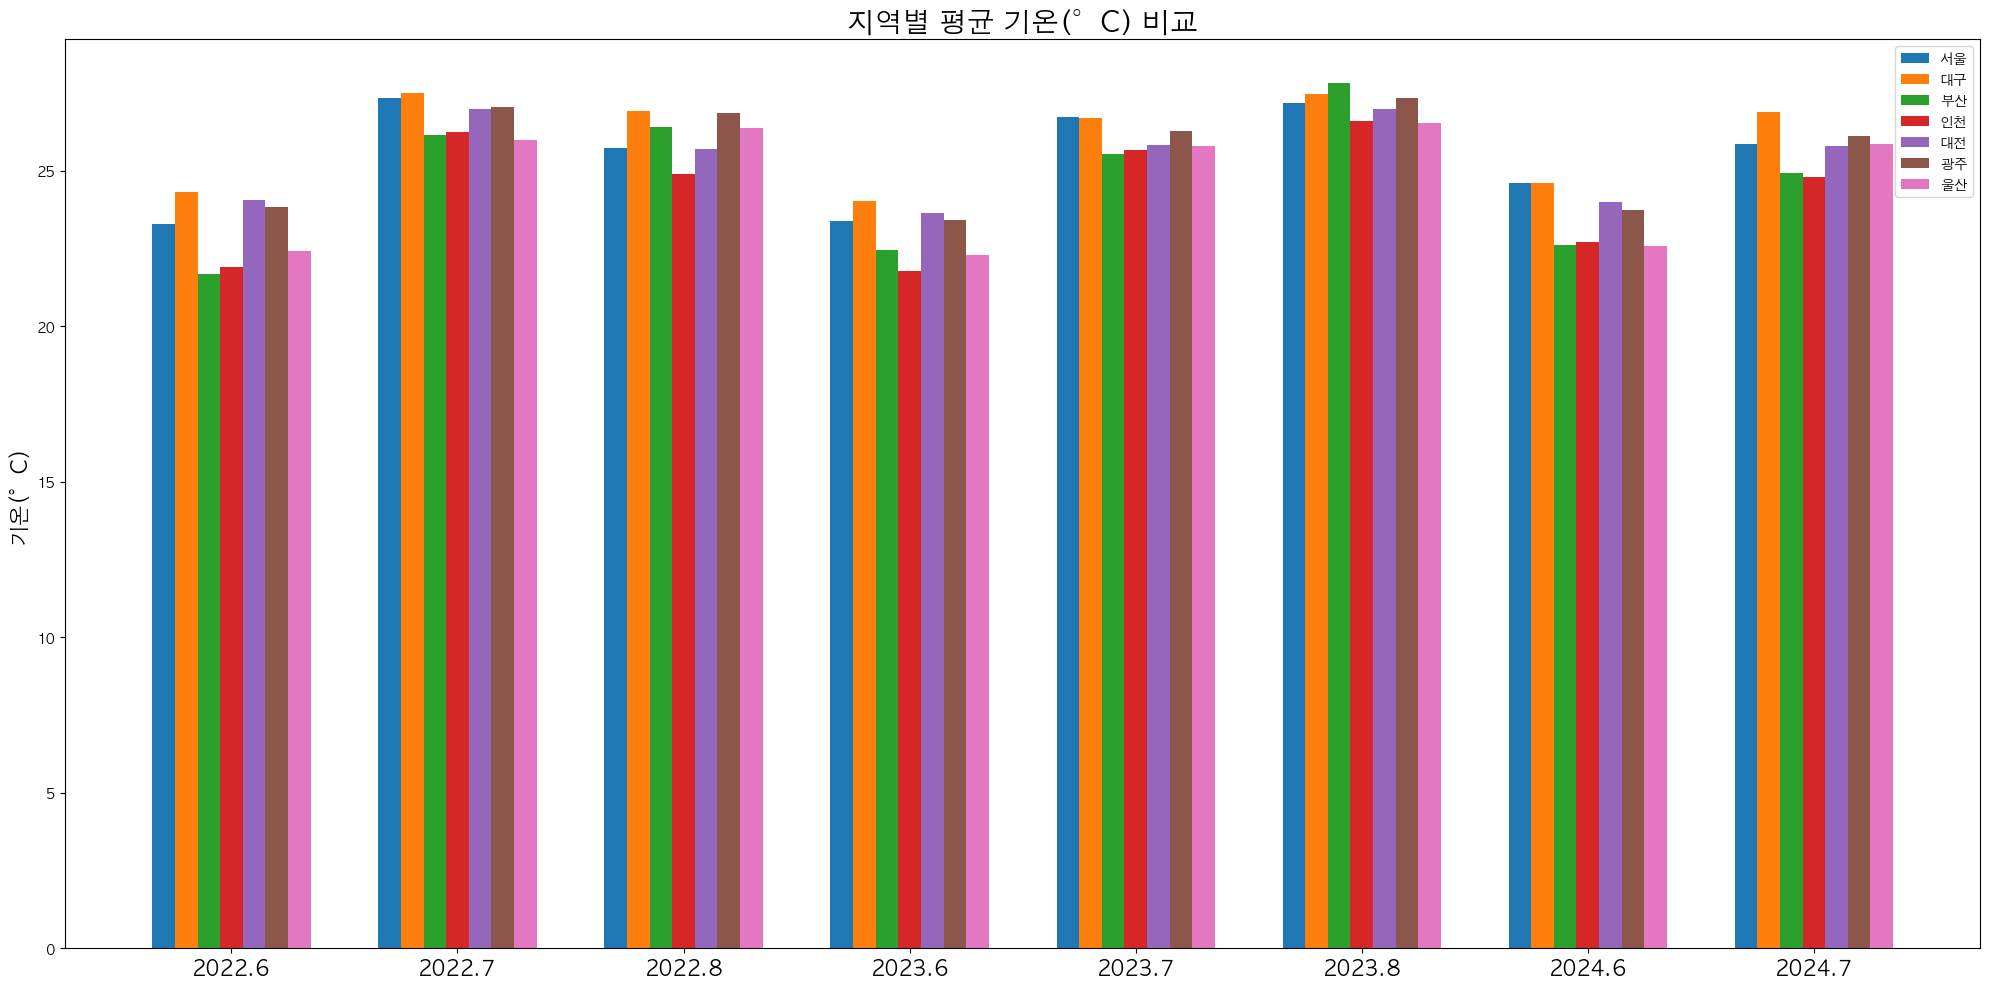

In [22]:
plt.figure(figsize = (20, 10))
plt.bar(np.arange(8) - 0.3, city_avg_temp(seoul), width = 0.1, label = '서울')
plt.bar(np.arange(8) - 0.2, city_avg_temp(daegu), width = 0.1, label = '대구')
plt.bar(np.arange(8) - 0.1, city_avg_temp(busan), width = 0.1, label = '부산')
plt.bar(np.arange(8), city_avg_temp(incheon), width = 0.1, label = '인천')
plt.bar(np.arange(8) + 0.1, city_avg_temp(daejeon), width = 0.1, label = '대전')
plt.bar(np.arange(8) + 0.2, city_avg_temp(gwangju), width = 0.1, label = '광주')
plt.bar(np.arange(8) + 0.3, city_avg_temp(ulsan), width = 0.1, label = '울산')

plt.title('지역별 평균 기온(°C) 비교', fontsize = 20)
plt.xticks(np.arange(8), month_list, fontsize = 15)
plt.ylabel('기온(°C)', fontsize = 15)
plt.legend()
plt.tight_layout()
plt.show()

> 전체적으로 대구가 높은 기온을 보였다.  
> 부산의 경우 전체적으로 낮은 기온을 보였지만 유독 2023.8에 높은 기온을 보였다.  

2023년 부산 역대 최고로 더웠다…연평균기온 16.0도  
https://www.busan.com/view/busan/view.php?code=2024011610474318709

- (2) 열대야 발생 여부에 따른 평균 기온 비교

> 열대야는 시민들의 일상 생활에 큰 영향을 미치므로, 열대야 발생 시와 그렇지 않을 시의 기온 차이를 분석하여 더나은 대처 방안을 마련할 수 있을 것이다.

> 열대야가 있을때가 없을때보다 평균 기온이 높은지 확인하고 지역별 특징이 있는지 확인

In [23]:
# 지역별 열대야에 따른 평균 기온 데이터프레임 생성하는 함수

def city_TN(city):
    return city[['열대야(O/X)', '평균기온(°C)']].groupby('열대야(O/X)').mean()

In [24]:
# 서울의 열대야에 따른 평균 기온
city_TN(seoul)

,평균기온(°C)
열대야(O/X),
O,28.469811
X,24.673492


In [25]:
# 대구의 열대야에 따른 평균 기온
city_TN(daegu)

,평균기온(°C)
열대야(O/X),
O,28.971739
X,25.339500


In [26]:
# 부산의 열대야에 따른 평균 기온
city_TN(busan)

,평균기온(°C)
열대야(O/X),
O,28.168519
X,23.706136


In [27]:
# 인천의 열대야에 따른 평균 기온
city_TN(incheon)

,평균기온(°C)
열대야(O/X),
O,28.115789
X,23.613747


In [28]:
# 대전의 열대야에 따른 평균 기온
city_TN(daejeon)

,평균기온(°C)
열대야(O/X),
O,28.746429
X,24.920923


In [29]:
# 광주의 열대야에 따른 평균 기온
city_TN(gwangju)

,평균기온(°C)
열대야(O/X),
O,28.195652
X,24.958570


In [30]:
# 울산의 열대야에 따른 평균 기온
city_TN(ulsan)

,평균기온(°C)
열대야(O/X),
O,28.160000
X,24.216016


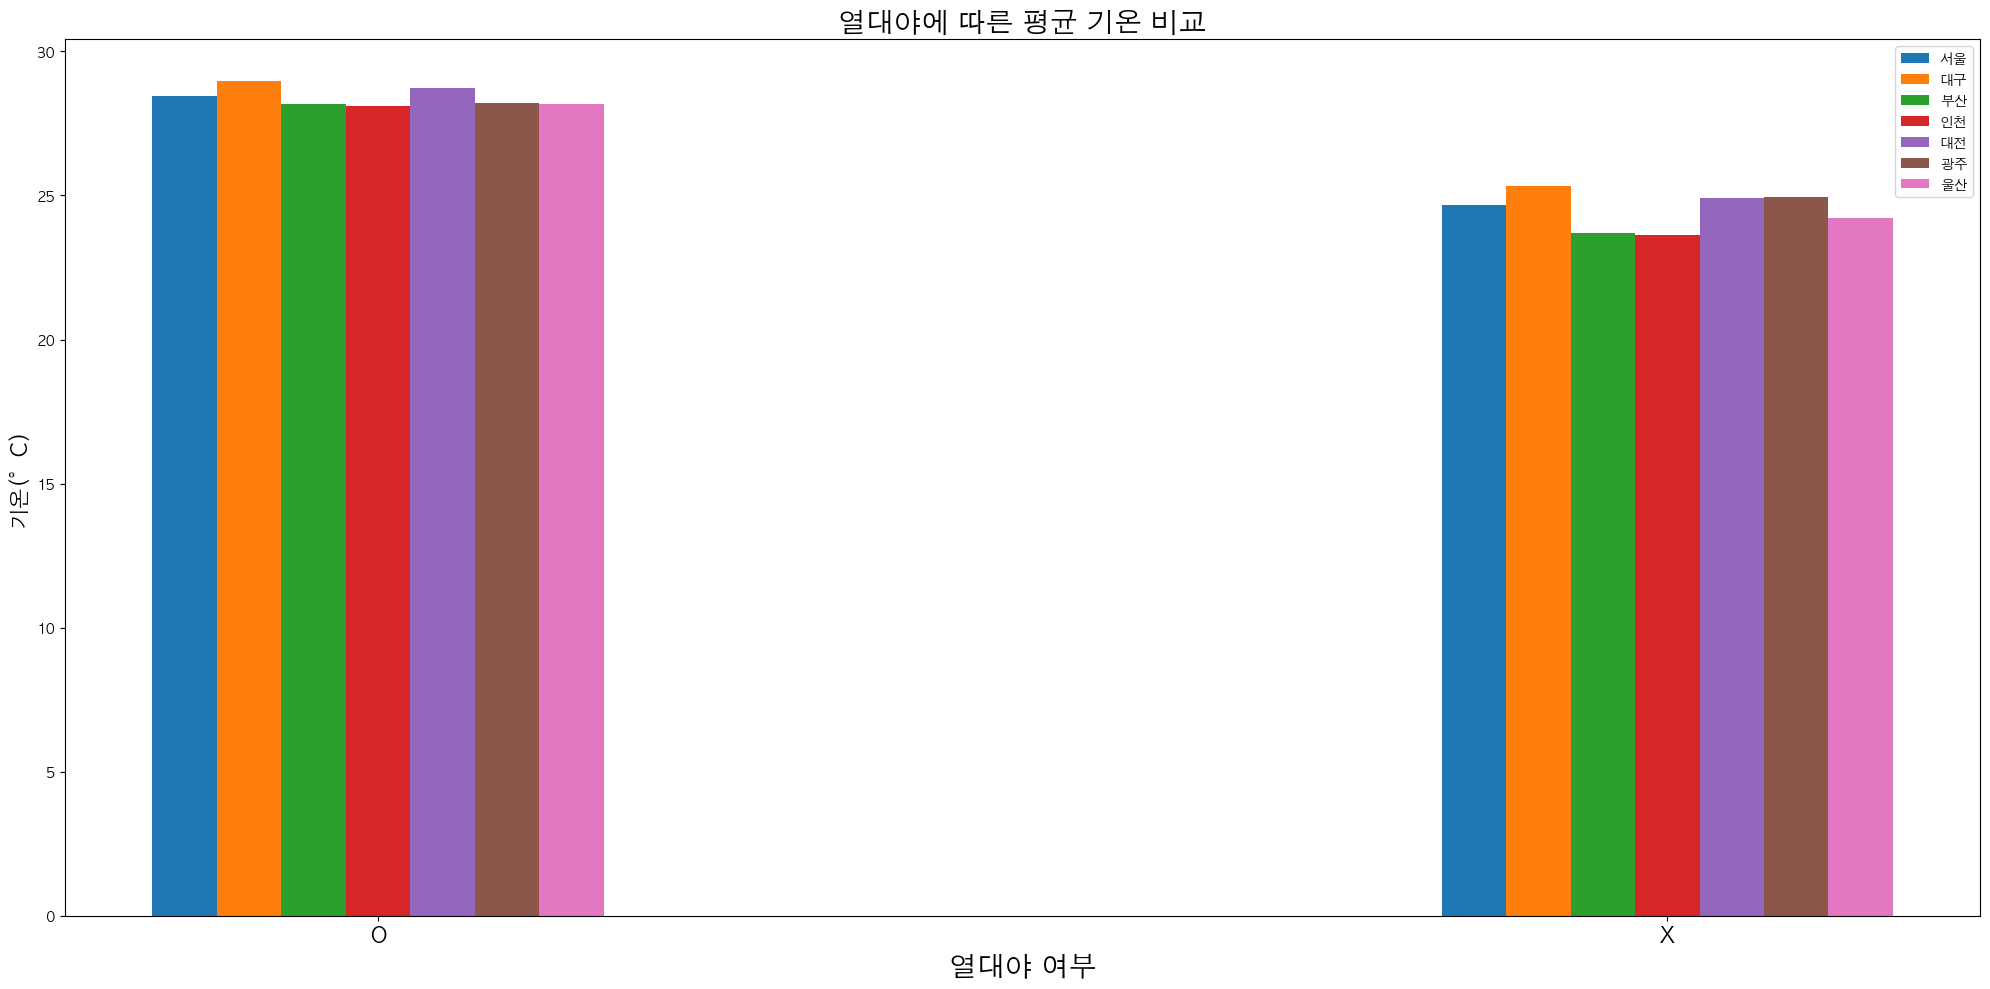

In [31]:
# 열대야에 따른 평균 기온 비교
plt.figure(figsize = (20, 10))
plt.bar(np.arange(2) - 0.15, list(city_TN(seoul)['평균기온(°C)']), width = 0.05, label = '서울')
plt.bar(np.arange(2) - 0.1, list(city_TN(daegu)['평균기온(°C)']), width = 0.05, label = '대구')
plt.bar(np.arange(2) - 0.05, list(city_TN(busan)['평균기온(°C)']), width = 0.05, label = '부산')
plt.bar(np.arange(2), list(city_TN(incheon)['평균기온(°C)']), width = 0.05, label = '인천')
plt.bar(np.arange(2) + 0.05, list(city_TN(daejeon)['평균기온(°C)']), width = 0.05, label = '대전')
plt.bar(np.arange(2) + 0.1, list(city_TN(gwangju)['평균기온(°C)']), width = 0.05, label = '광주')
plt.bar(np.arange(2) + 0.15, list(city_TN(ulsan)['평균기온(°C)']), width = 0.05, label = '울산')

plt.title('열대야에 따른 평균 기온 비교', fontsize = 20)
plt.xticks(np.arange(2), ['O', 'X'], fontsize = 15)
plt.xlabel('열대야 여부', fontsize = 20)
plt.ylabel('기온(°C)', fontsize = 15)
plt.legend()
plt.tight_layout()
plt.show()

> 모든 지역에서 열대야가 있을때가 없을때보다 평균 기온이 높았다.  
> 대구가 열대야 여부에 관계없이 가장 기온이 높다.  
> 바다가 있는 부산, 인천, 울산은 비교적 온도가 낮다.

- (3) 습도와 체감 온도 간의 관계 분석  

> 습도가 높을수록 불쾌 지수가 높아져 심리적 요소인 체감 온도도 높아질 것으로 생각하여 두 변수 간에 관계가 있을 것으로 생각

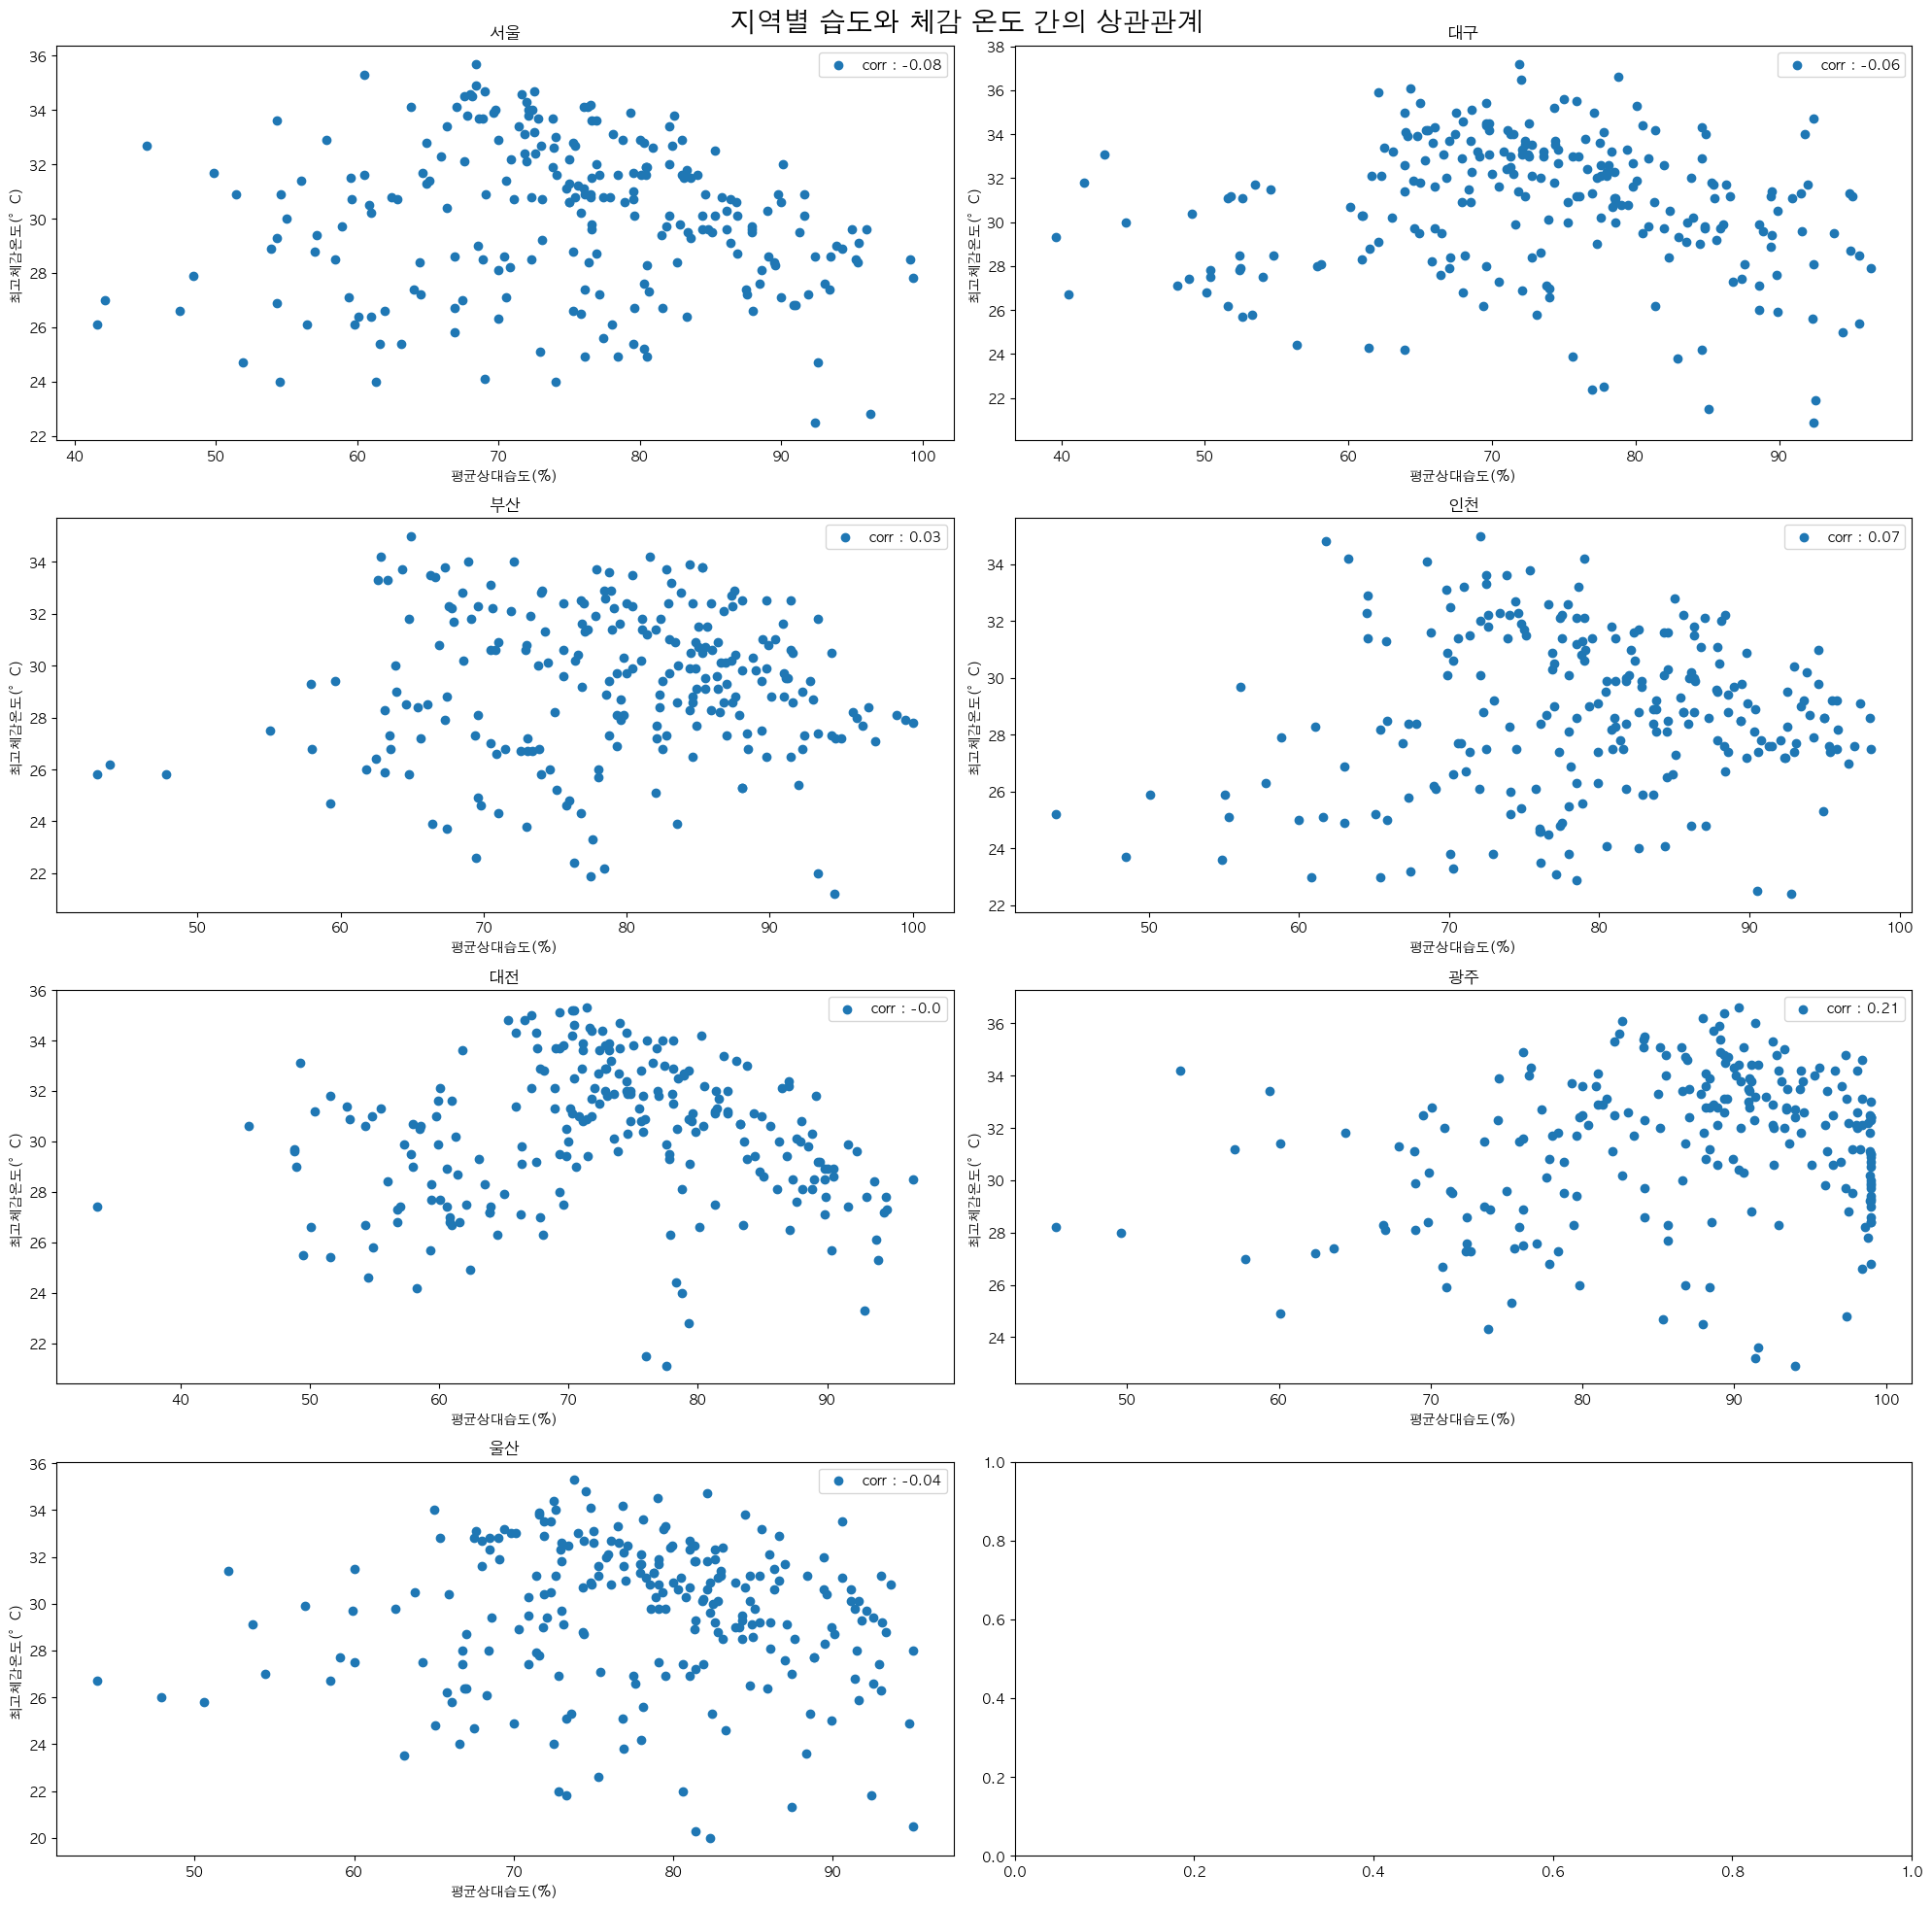

In [32]:
# 지역별 습도와 체감 온도 간의 상관관계
city_list = [seoul, daegu, busan, incheon, daejeon, gwangju, ulsan]

fig, axes = plt.subplots(4, 2, figsize = (20, 20))

for i in range(4):
    for j in range(2):
        if i == 3 and j == 1:
            continue
        else:
            axes[i, j].scatter(city_list[i*2 + j]['평균상대습도(%)'],
                               city_list[i*2 + j]['최고체감온도(°C)'],
                               label = f'corr : {round(city_list[i*2 + j][["평균상대습도(%)", "최고체감온도(°C)"]].corr().values[0][1], 2)}')
            axes[i, j].set_title(city_name[i*2 + j])
            axes[i, j].set_xlabel('평균상대습도(%)')
            axes[i, j].set_ylabel('최고체감온도(°C)')
            axes[i, j].legend()

plt.suptitle('지역별 습도와 체감 온도 간의 상관관계', fontsize = 20)
plt.tight_layout()
plt.show()



> 습도와 체감 온도 간의 관계가 있을 것으로 생각했지만 큰 상관관계는 발견하지 못하였다.  
> 아마도 상관분석으로는 관계를 파악하기 힘들고 평균온도와 상대습도를 비롯한 여러 변수를 설명변수로 두고 체감온도를 반응변수로 둔 회귀분석을 진행해서 인과관계를 파악해야 할 것으로 생각된다. 

- (4) 지역별 폭염영향예보(단계) 비율 비교

> 지역별 폭염영향예보 비율을 비교하여 어느 지역이 위험 비율이 많은지 확인

In [33]:
x = seoul['폭염영향예보(단계)'].value_counts().index
h = seoul['폭염영향예보(단계)'].value_counts().values
x, h

(Index(['없음', '관심', '주의', '경고'], dtype='object', name='폭염영향예보(단계)'),
 array([101,  70,  46,  20]))

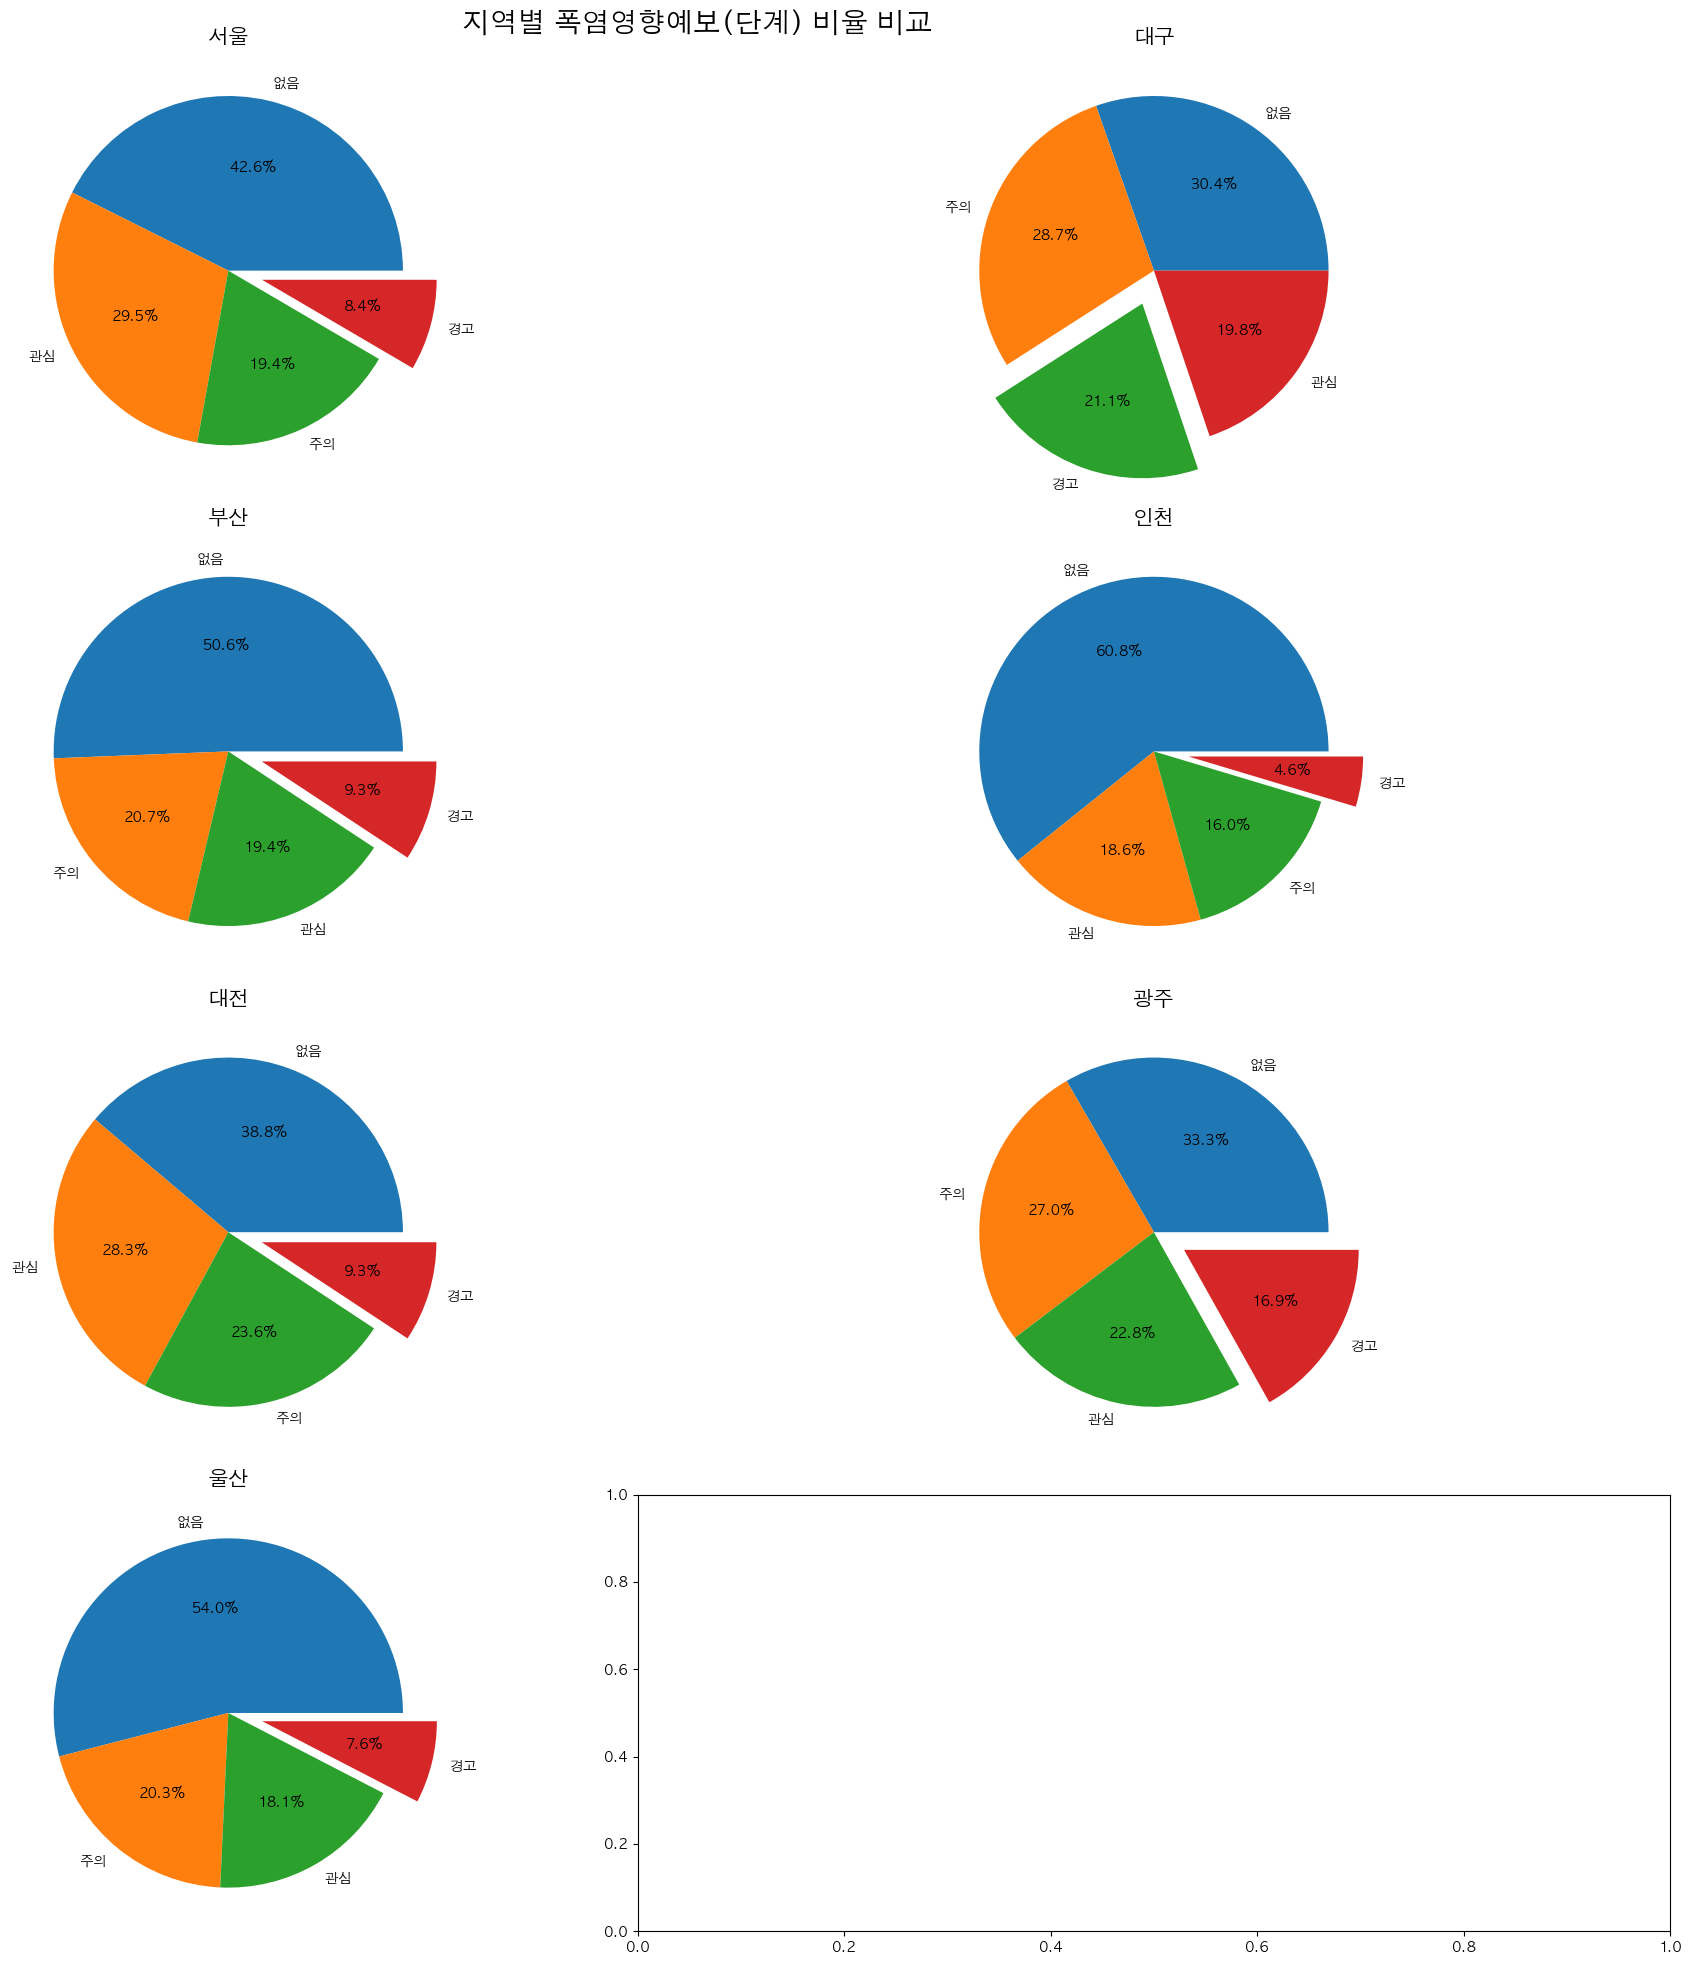

In [34]:
city_list = [seoul, daegu, busan, incheon, daejeon, gwangju, ulsan]
fig, axes = plt.subplots(4, 2, figsize = (20, 20))

for i in range(4):
    for j in range(2):
        if i == 3 and j == 1:
            continue
        else:
            x = city_list[i*2 + j]['폭염영향예보(단계)'].value_counts().index
            h = city_list[i*2 + j]['폭염영향예보(단계)'].value_counts().values
            if i == 0 and j == 1:
                axes[i, j].pie(h, labels = x, autopct = f'%.1f%%', explode = [0, 0, 0.2, 0])
            else:
                axes[i, j].pie(h, labels = x, autopct = f'%.1f%%', explode = [0, 0, 0, 0.2])
            
            axes[i, j].set_title(city_name[i*2 + j], fontsize = 15)

plt.suptitle('지역별 폭염영향예보(단계) 비율 비교', fontsize = 20)

plt.tight_layout()
plt.show()

> 대구랑 광주가 폭염영향예보 경고 비율이 각각 21.1%, 16.9%로 높게 나타났다.  
> 대구랑 광주가 위도가 낮기 때문에 더운 것으로 생각된다.  

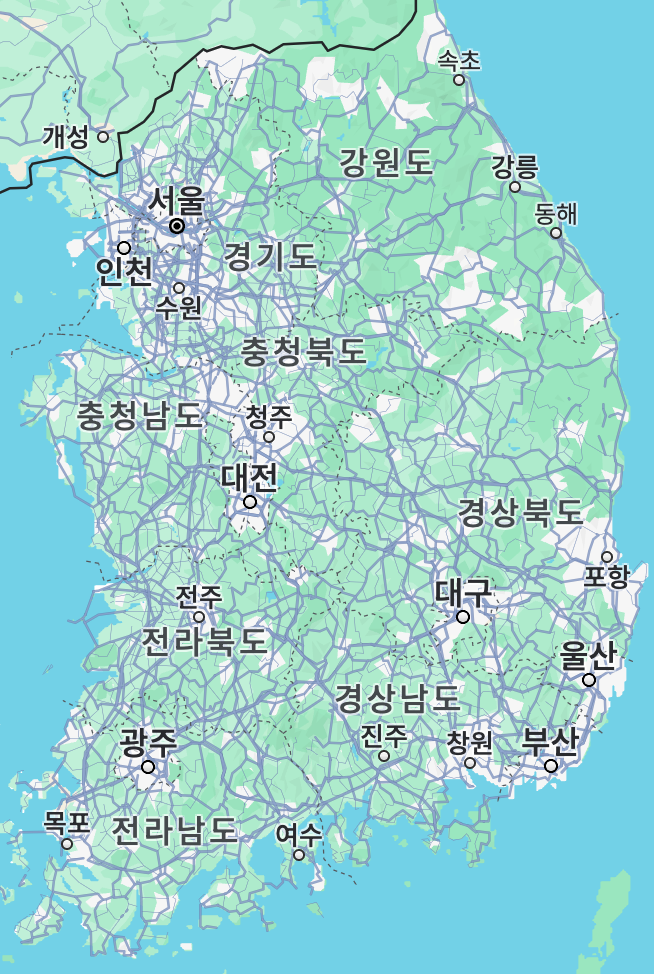

> 다양한 비교 분석에서 대구가 더운 곳으로 판명되었다. 이유를 살펴보니 대구는 북쪽에 팔공산, 남쪽에 앞산과 비슬산이 가로막고 있는 분지라서 더운 공기가 빠져나가기 힘든 구조이기 때문이다. 사방에서 불어오는 공기는 대구 분지에 계속해서 쌓여 찜통 더위의 원인으로 작용한다. 게다가 인구밀도와 도시화 비율이 높은 광역시여서 지형적, 인구학적 원인으로 열섬현상까지 나타나는 실정이다.

[출처] 한국학중앙연구원 - 향토문화전자대전

> 지형적 특징으로 인해 대구의 기온을 낮추기엔 한계가 있을 것으로 생각된다. 실제로도 피할 수 없다면 즐기자는 역발상으로 대구지역의 폭염을 활용한 물총 축제, 호러연극 축제 등과 같은 사업을 추진 중이라고 한다. 앞으로도 흠뻑쇼 등을 비롯한 더위를 식힐 수 있는 행사가 많아져 대구 시민들이 여름철 더위를 잘 이겼으면 좋겠다.